In [1]:
#this program is redundant with updated code for collocating storms.
#i only ran it to update the interpolated track files for data that was already run
#but then i included the new interpolatin code into the subroutine so all future runs
#collocating storms will automatically include the additional variables (wind, pres, bas9n)

#second part of reducndant code adds storm wind and pressure to combined data 

#from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
import time
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
####################you will need to change some paths here!#####################
#list of input directories
dir_storm_info='f:/data/tc_wakes/database/info/'
dir_out='f:/data/tc_wakes/database/sst/'
dir_flux = 'F:/data/model_data/oaflux/data_v3/daily/turbulence/'
dir_cmc = 'F:/data/sst/cmc/CMC0.2deg/v2/'
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
##where to get the data through opendap, use these directories instead
#dir_cmc = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/CMC/CMC0.1deg/v3/'
#dir_flux = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/WHOI_OAFlux/version3/daily/lh_oaflux/'
#the latest ccmp is from www.remss.com but they do not have an opendap server so you can use this instead:
#dir_ccmp='https://podaac-opendap.jpl.nasa.gov/opendap/allData/ccmp/L3.0/flk/'

#################################################################################
import geopy.distance
from math import sin, pi
from scipy import interpolate

#functions for running storm data
import sys
sys.path.append('C:/Users/gentemann/Google Drive/d_drive/python/storm_heat_content/subroutines/')
from storm_masking_routines import interpolate_storm_path
#from storm_masking_routines import get_dist_grid
#from storm_masking_routines import closest_dist
#from storm_masking_routines import calculate_storm_mask


In [6]:
input_year = 2003
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
isave_mld_year = 0 #init MLD monthly data read flag
for root, dirs, files in os.walk(dir_storm_info, topdown=False):
    if root[len(dir_storm_info):len(dir_storm_info)+1]=='.':
        continue
    for name in files:
        if not name.endswith('.nc'):
            continue
        filename=os.path.join(root, name)
        print(filename[36:39],filename[31:35])
        inum_storm=int(filename[36:39])
        iyr_storm=int(filename[31:35])

        if iyr_storm!=2010:
            continue
        if inum_storm!=55:
            continue

#        if iyr_storm!=2007: # or iyr_storm<2003:
#            continue
        print(name,filename)
        ds_storm_info = xr.open_dataset(filename)
        ds_storm_info.close()

        ds_storm_interp = interpolate_storm_path(ds_storm_info)
            
#        filename = dir_out + str(iyr_storm) + '/' + str(inum_storm).zfill(3) + '_interpolated_track.nc'
#        ds_storm_interp.to_netcdf(filename)
#        print('out:',filename)
    

001 2002
002 2002
005 2002
007 2002
009 2002
010 2002
011 2002
012 2002
013 2002
014 2002
015 2002
017 2002
018 2002
019 2002
020 2002
021 2002
022 2002
023 2002
025 2002
027 2002
028 2002
030 2002
031 2002
033 2002
034 2002
035 2002
036 2002
037 2002
039 2002
040 2002
041 2002
042 2002
043 2002
046 2002
047 2002
048 2002
049 2002
050 2002
051 2002
052 2002
053 2002
054 2002
055 2002
056 2002
058 2002
060 2002
061 2002
063 2002
064 2002
066 2002
067 2002
068 2002
069 2002
070 2002
072 2002
075 2002
077 2002
081 2002
082 2002
083 2002
084 2002
002 2003
003 2003
004 2003
005 2003
006 2003
008 2003
009 2003
010 2003
011 2003
012 2003
013 2003
015 2003
016 2003
017 2003
018 2003
019 2003
021 2003
022 2003
023 2003
024 2003
025 2003
026 2003
027 2003
028 2003
031 2003
032 2003
033 2003
034 2003
035 2003
036 2003
037 2003
038 2003
040 2003
042 2003
044 2003
046 2003
047 2003
048 2003
049 2003
050 2003
051 2003
055 2003
057 2003
059 2003
060 2003
064 2003
065 2003
066 2003
067 2003
070 2003
0

In [10]:
ds_storm_interp

<xarray.Dataset>
Dimensions:           (i2: 81, j2: 1)
Dimensions without coordinates: i2, j2
Data variables:
    lon               (j2, i2) float64 141.4 140.7 140.2 ... 147.1 147.8 148.2
    lat               (j2, i2) float64 15.6 16.35 16.9 17.65 ... 33.9 33.76 33.7
    time              (j2, i2) float64 5.544e+04 5.544e+04 ... 5.545e+04
    wind              (j2, i2) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pres              (j2, i2) float64 1.008e+03 1.008e+03 ... 1.004e+03
    basin             (j2, i2) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    storm_speed_kmhr  (j2, i2) float64 32.14 32.1 28.14 ... 17.37 17.39 17.39

Frozen(SortedKeysDict({'j2': 1, 'i2': 48}))
Frozen(SortedKeysDict({'j2': 1, 'i2': 81}))


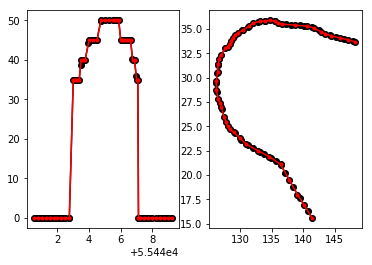

In [7]:
plt.subplot(121)
plt.plot(ds_storm_interp.time[0,:],ds_storm_interp.wind[0,:],'ko-')
plt.plot(ds_storm_info.time[0,:],ds_storm_info.wind[0,:],'r.-')
plt.subplot(122)
plt.plot(ds_storm_interp.lon[0,:],ds_storm_interp.lat[0,:],'ko-')
plt.plot(ds_storm_info.lon[0,:],ds_storm_info.lat[0,:],'r.-')
print(ds_storm_info.dims)
print(ds_storm_interp.dims)

In [8]:
for i in range(-3,0):
    print(ds_storm_info.lat[0,i].values,ds_storm_interp.lat[0,i].values)
for i in range(-3,0):
    print(ds_storm_info.lon[0,i].values,ds_storm_interp.lon[0,i].values)


34.099999237805605 33.89999924227595
33.89999924227595 33.76363560591232
33.6999992467463 33.6999992467463
145.79999674111605 147.09999671205878
147.09999671205878 147.84999671205878
148.19999668747187 148.19999668747187


In [9]:
print(ds_storm_info.lon[0,:])
print(ds_storm_interp.lon[0,:])

<xarray.DataArray 'lon' (i2: 48)>
array([141.399997, 140.199997, 139.099997, 137.799997, 136.399997, 134.599997,
       132.799997, 130.899997, 129.899997, 128.999997, 128.299997, 127.999997,
       127.799997, 127.399997, 126.999997, 126.799997, 126.499997, 126.199997,
       126.199997, 126.399997, 126.499997, 126.599997, 126.899997, 127.599997,
       127.999997, 128.299997, 128.599997, 128.799997, 129.199997, 129.599997,
       130.499997, 131.399997, 131.999997, 133.199997, 133.999997, 134.699997,
       135.599997, 135.999997, 136.599997, 138.699997, 140.599997, 141.699997,
       142.899997, 143.499997, 144.499997, 145.799997, 147.099997, 148.199997])
Dimensions without coordinates: i2
<xarray.DataArray 'lon' (i2: 81)>
array([141.399997, 140.707689, 140.199997, 139.449997, 139.099997, 138.449997,
       137.799997, 137.143747, 136.487497, 136.399997, 135.649997, 134.899997,
       134.599997, 133.849997, 133.099997, 132.799997, 132.049997, 131.299997,
       130.899997, 130.1499

In [ ]:
import os
import xarray as xr
import numpy as np

#still processing 2002, 2011 - onwards
for iyr_storm=2003,2011:
    for inum_storm=0,100:
#iyr_storm,inum_storm = 2004,6
    dir_out='f:/data/tc_wakes/database/sst/'
    filename = dir_out + str(iyr_storm) + '/' + str(inum_storm).zfill(3) + '_interpolated_track.nc'
    exists = os.path.isfile(filename)
    if exists:
        print(filename)
        ds_storm_info=xr.open_dataset(filename)
        ds_storm_info = ds_storm_info.sel(j2=0)
        ds_storm_info.close()
        filename = dir_out + str(iyr_storm) + '/' + str(inum_storm).zfill(3) + '_combined_data.nc'
        ds_all = xr.open_dataset(filename)
        ds_all.close()
        xdim,ydim,tdim = ds_all.lon.shape[0],ds_all.lat.shape[0],ds_all.time.shape[0]
        wtem=np.empty([ydim,xdim])
        ptem=np.empty([ydim,xdim])
        for i in range(0,xdim):
            for j in range(0,ydim):
                storm_index = ds_all.closest_storm_index[j,i].data
                wtem[j,i]=ds_storm_info.wind[int(storm_index)].data
                ptem[j,i]=ds_storm_info.pres[int(storm_index)].data
        xrtem=xr.DataArray(wtem, coords={'lat': ds_all.lat.values, 'lon':ds_all.lon.values}, dims=('lat', 'lon'))        
        ds_all['wmo_storm_wind']=xrtem
        xrtem=xr.DataArray(ptem, coords={'lat': ds_all.lat.values, 'lon':ds_all.lon.values}, dims=('lat', 'lon'))        
        ds_all['wmo_storm_pres']=xrtem
    filename = dir_out + str(iyr_storm) + '/' + str(inum_storm).zfill(3) + '_combined_data.nc'
    ds_all.to_netcdf(filename)

In [ ]:
ds_all

In [ ]:

# coding: utf-8

import numpy as np
from scipy import interpolate
import xarray as xr
#after calculating the distance from the storm it became clear that the storm data is every 6 hours, no matter 
#how much it may have moved.  So if the storm moved 300 km in 6 hr, when calculating the distance to the storm
#there were points on the storm track that showed large distances because of the separation to the 6hrly storm points
#this subroutine interpolates the storm path onto a higher spatial resolution
#the new storm dataset is carefully put into an identical format with i2 and j2 as dims to match the old format

filename='f:/data/tc_wakes/database/info/2010/001annual_storm_info_extended.nc'
dsx = xr.open_dataset(filename)
dsx.close()
print(dsx)

ynew = []
tnew = []
xnew = []
wnew = []
pnew = []
bnew = []
dsx['lon'] = (dsx.lon-180) % 360 - 180 #put -180 to 180
for istep in range(1,dsx.lon.shape[1]):
    dif_lat = dsx.lat[0,istep]-dsx.lat[0,istep-1]
    dif_lon = dsx.lon[0,istep]-dsx.lon[0,istep-1]
    x,y,t = dsx.lon[0,istep-1:istep+1].values,dsx.lat[0,istep-1:istep+1].values,dsx.time[0,istep-1:istep+1].values
    w,p,b = dsx.wind[0,istep-1:istep+1].values,dsx.pres[0,istep-1:istep+1].values,dsx.basin[0,istep-1:istep+1].values
    x1,y1,t1 = dsx.lon[0,istep-1:istep].values,dsx.lat[0,istep-1:istep].values,dsx.time[0,istep-1:istep].values
    w1,p1,b1 = dsx.wind[0,istep-1:istep].values,dsx.pres[0,istep-1:istep].values,dsx.basin[0,istep-1:istep].values
    if abs(dif_lat)>abs(dif_lon):
        isign = np.sign(dif_lat)
        if abs(dif_lat)>0.75:
            ynew1 = np.arange(y[0], y[-1], isign.data*0.75)
            f = interpolate.interp1d(y, x, assume_sorted=False)
            xnew1 = f(ynew1)
            f = interpolate.interp1d(y, t, assume_sorted=False)
            tnew1 = f(ynew1)
            f = interpolate.interp1d(y, w, assume_sorted=False)
            wnew1 = f(ynew1)
            f = interpolate.interp1d(y, p, assume_sorted=False)
            pnew1 = f(ynew1)
            f = interpolate.interp1d(y, b, assume_sorted=False)
            bnew1 = f(ynew1)
        else:
            xnew1,ynew1,tnew1,wnew1,pnew1,bnew1 = x1,y1,t1,w1,p1,b1
        xnew,ynew,tnew = np.append(xnew,xnew1),np.append(ynew,ynew1),np.append(tnew,tnew1) 
        wnew,pnew,bnew = np.append(wnew,wnew1),np.append(pnew,pnew1),np.append(bnew,bnew1) 
    else:
        isign = np.sign(dif_lon)
        if abs(dif_lon)>0.75:
            iwrap_interp = 1
            if (x[0]<-90) & (x[-1]>90):
                iwrap_interp = -1
                x[0]=x[0]+360
            if (x[0]>90) & (x[-1]<-90):
                iwrap_interp = -1
                x[-1]=x[-1]+360
            xnew1 = np.arange(x[0], x[-1], iwrap_interp*isign.data*0.75)
            f = interpolate.interp1d(x, y, assume_sorted=False)
            ynew1 = f(xnew1)
            f = interpolate.interp1d(x, t, assume_sorted=False)
            tnew1 = f(xnew1)
            f = interpolate.interp1d(x, w, assume_sorted=False)
            wnew1 = f(xnew1)
            f = interpolate.interp1d(x, p, assume_sorted=False)
            pnew1 = f(xnew1)
            f = interpolate.interp1d(x, b, assume_sorted=False)
            bnew1 = f(xnew1)
            xnew1 = (xnew1 - 180) % 360 - 180 #put -180 to 180
        else:
            xnew1,ynew1,tnew1 = x1,y1,t1
            wnew1,pnew1,bnew1 = w1,p1,b1
        xnew,ynew,tnew = np.append(xnew,xnew1),np.append(ynew,ynew1),np.append(tnew,tnew1) 
        wnew,pnew,bnew = np.append(wnew,wnew1),np.append(pnew,pnew1),np.append(bnew,bnew1) 
x1,y1,t1 = dsx.lon[0,-1].values,dsx.lat[0,-1].values,dsx.time[0,-1].values
w1,p1,b1 = dsx.wind[0,-1].values,dsx.pres[0,-1].values,dsx.basin[0,-1].values
xnew1,ynew1,tnew1 = x1,y1,t1
wnew1,pnew1,bnew1 = w1,p1,b1
xnew,ynew,tnew = np.append(xnew,xnew1),np.append(ynew,ynew1),np.append(tnew,tnew1) 
wnew,pnew,bnew = np.append(wnew,wnew1),np.append(pnew,pnew1),np.append(bnew,bnew1) 
#print(xnew)
#remove any repeated points
ilen=xnew.size
outputx,outputy,outputt,outputw,outputp,outputb=[],[],[],[],[],[]
for i in range(0,ilen-1):
    if (xnew[i]==xnew[i+1]) and (ynew[i]==ynew[i+1]):
        continue
    else:
        outputx,outputy,outputt = np.append(outputx,xnew[i]),np.append(outputy,ynew[i]),np.append(outputt,tnew[i])
        outputw,outputp,outputb = np.append(outputw,wnew[i]),np.append(outputp,pnew[i]),np.append(outputb,bnew[i])
outputx,outputy,outputt = np.append(outputx,xnew[-1]),np.append(outputy,ynew[-1]),np.append(outputt,tnew[-1])
outputw,outputp,outputb = np.append(outputw,wnew[-1]),np.append(outputp,pnew[-1]),np.append(outputb,bnew[-1])
xnew,ynew,tnew=outputx,outputy,outputt
wnew,pnew,bnew=outputw,outputp,outputb
#put into xarray
i2,j2=xnew.shape[0],1
tem = np.expand_dims(xnew, axis=0)
xx = xr.DataArray(tem.T,dims=['i2','j2'])
tem = np.expand_dims(ynew, axis=0)
yy = xr.DataArray(tem.T,dims=['i2','j2'])
tem = np.expand_dims(tnew, axis=0)
tt = xr.DataArray(tem.T,dims=['i2','j2'])
tem = np.expand_dims(wnew, axis=0)
ww = xr.DataArray(tem.T,dims=['i2','j2'])
tem = np.expand_dims(pnew, axis=0)
pp = xr.DataArray(tem.T,dims=['i2','j2'])
tem = np.expand_dims(bnew, axis=0)
bb = xr.DataArray(tem.T,dims=['i2','j2'])
dsx_new = xr.Dataset({'lon':xx.T,'lat':yy.T,'time':tt.T,'wind':ww.T,'pres':pp.T,'basin':bb.T})

#add storm translation speed to storm information
tdim_storm = dsx_new.time.size
storm_speed = dsx_new.time.copy(deep=True)*np.nan    
for i in range(0,tdim_storm-1):
    coords_1 = (dsx_new.lat[0,i], dsx_new.lon[0,i])  
    coords_2 = (dsx_new.lat[0,i+1], dsx_new.lon[0,i+1])  
    arclen_temp = geopy.distance.geodesic(coords_1, coords_2).km  #distance in km  
    storm_date1 = np.datetime64(date_1858 + dt.timedelta(days=float(dsx_new.time[0,i])))  
    storm_date2 = np.datetime64(date_1858 + dt.timedelta(days=float(dsx_new.time[0,i+1])))  
    arclen_time = storm_date2 - storm_date1
    arclen_hr = arclen_time / np.timedelta64(1, 'h')
    storm_speed[0,i]=arclen_temp/(arclen_hr)
storm_speed[0,-1]=storm_speed[0,-2]
dsx_new['storm_speed_kmhr']=storm_speed   


print(dsx_new)



In [ ]:
print(dsx.lon[0,:])
print(dsx_new.lon[0,:])